In [1]:
import numpy as np
from scipy.spatial import Delaunay
import networkx as nx
 
import processing.processing_functions as pr
import graph_generation.graph_generation_func as graph

In [27]:
cells = pr.generate_artificial_spheroid(20)['cells']
spheroid = {}
spheroid['cells'] = cells

G = graph.generate_voronoi_graph(spheroid, zRatio = 1, dCells = 0.4)

In [28]:
for ind in G.nodes():
    
    G.add_node(ind, color = 'r')

In [29]:
pos =nx.get_node_attributes(G,'pos')

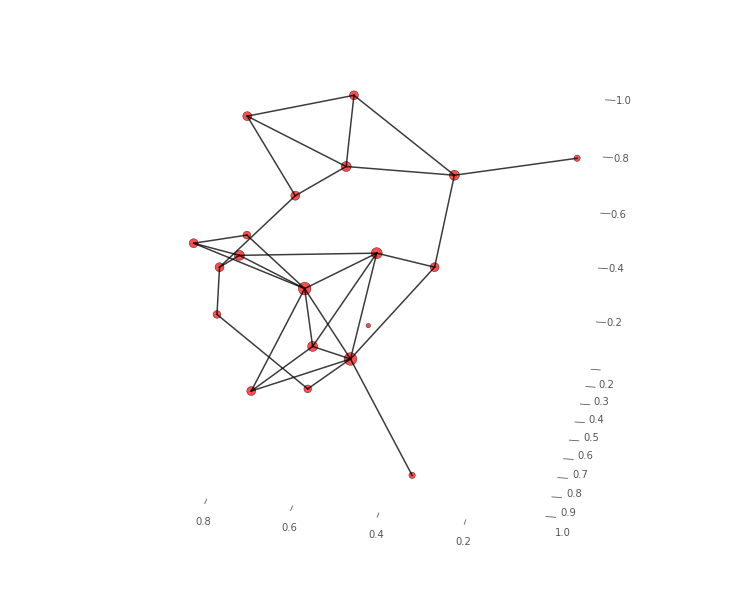

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

network_plot_3D(G, 100)

In [9]:
def network_plot_3D(G, angle,include_color:bool = False, save=False):
 
    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')
        
    # Get number of nodes
    n = G.number_of_nodes()
 
    # Get the maximum number of edges adjacent to a single node
    edge_max = max([G.degree(i) for i in range(n)])
 
    # Define color range proportional to number of edges adjacent to a single node
    colors = nx.get_node_attributes(G, 'color')
 
    # 3D network plot
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(10,8))
        ax = Axes3D(fig)
        
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        
        for i,j in enumerate(G.edges()):
             
            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))
        
        # Plot the connecting lines
            ax.plot(x, y, z, c='black', alpha=60)
            
        x = []
        y = []
        z = []
        nodeColor = []
        s = []
            
        for key, value in pos.items():
            x.append(value[0])
            y.append(value[1])
            z.append(value[2])
            s.append(20+20*G.degree(key))
            nodeColor.append(colors[key])
         # Scatter plot
        sc = ax.scatter(x, y, z, c=nodeColor, s=s, edgecolors='k', alpha=0.7)
        
        # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
        # Those two points are the extrema of the line to be plotted

    
    # Set the initial view
    ax.view_init(30, angle)
    fig.patch.set_facecolor((1.0, 1, 1))
    ax.set_facecolor((1.0, 1, 1))
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    plt.rc('grid', linestyle="-", color='black')
    #plt.axis('off')
    
    #ax.set_xlabel('X axis ($\mu m$)')
    #ax.set_ylabel('Y axis ($\mu m$)')
    #ax.set_zlabel('Z axis ($\mu m$)')
    #ax.set_xlim(100, 250)
    #ax.set_ylim(100, 250)
    #ax.set_zlim(50, 90)
    return